# IROS2024 Radar Chart Plot

plot radar charts to explain the result of the IROS2024 paper.
https://arxiv.org/pdf/2409.08648

![result_table](../media/iros2024_result_table.png)

In [83]:
from pycirclize import Circos
import pandas as pd
color = {"red": "#FF4B00", "green": "#03AF7A", "blue": "#005AFF", "purple": "#b000b0"}
# referring nice color palet from https://contents-open.hatenablog.com/entry/2021/08/19/231157

## Cylinder Garden

                 Cost  Steering Rate  Wheel Acc.  Trajectory Length  \
MPPI-3D(a)   3.068421      22.727273   11.739130          18.235294   
MPPI-3D(b)  73.657895      86.363636   84.347826          52.941176   
MPPI-4D     97.063158      63.636364   53.043478          83.529412   
MPPI-H      46.031579      45.454545   13.913043          72.941176   

            Episode Time  Success Rate  
MPPI-3D(a)     46.666667     19.933555  
MPPI-3D(b)      5.833333     63.122924  
MPPI-4D        30.000000     99.667774  
MPPI-H         90.000000     96.345515  


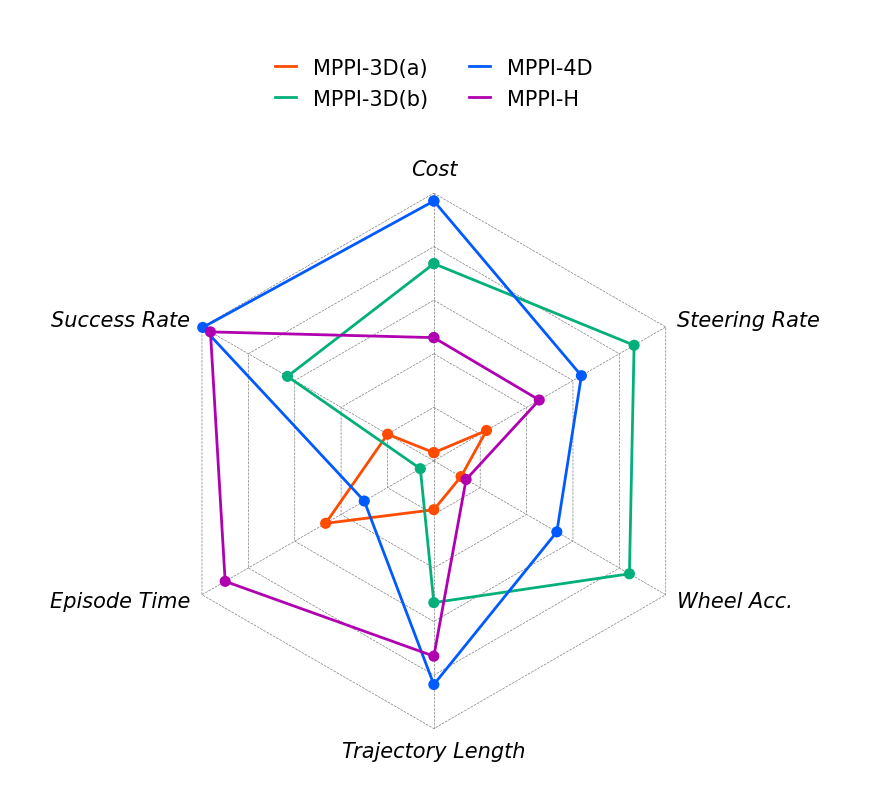

In [84]:
# Evaluation Results of Cylinder Garden
# set original data ["Cost", "Steering Rate", "Wheel Acc.", "Traj. Length", "Episode Time", "Success Rate"]
original_data = [
    [3241.7, 4.5, 5.03, 51.9, 36.4, 76.0],
    [1900.5, 3.1, 3.36, 46.0, 41.3, 89.0],
    [1455.8, 3.6, 4.08, 40.8, 38.4, 100.0],
    [2425.4, 4.0, 4.98, 42.6, 31.2, 99.0],
]

# convert the original data to 0 - 100 scale, bigger is better 
normalized_data = []
which_is_better = ["smaller", "smaller", "smaller", "smaller", "smaller", "bigger"]
min_values = [1400.0, 2.8, 3.0, 38.0, 30.0, 70.0]
max_values = [3300.0, 5.0, 5.3, 55.0, 42.0, 100.1]
for row in original_data:
    normalized_row = []
    for i, value in enumerate(row):
        if which_is_better[i] == "smaller":
            normalized_row.append(100 * (1 - (value - min_values[i]) / (max_values[i] - min_values[i])))
        elif which_is_better[i] == "bigger":
            normalized_row.append(100 * (value - min_values[i]) / (max_values[i] - min_values[i]))
    normalized_data.append(normalized_row)

# create a dataframe
df = pd.DataFrame(
    data=normalized_data,
    index=[
        "MPPI-3D(a)", 
        "MPPI-3D(b)",
        "MPPI-4D",
        "MPPI-H"
    ],
    columns=[
        "Cost",
        "Steering Rate",
        "Wheel Acc.",
        "Trajectory Length",
        "Episode Time",
        "Success Rate",
    ]
)
print(df)

# initialize Circos object & plot radar chart
circos = Circos.radar_chart(
    df,
    vmax=100.0,
    fill=False,
    marker_size=8,
    bg_color=None,
    cmap={
        "MPPI-3D(a)": color["red"],
        "MPPI-3D(b)": color["green"],
        "MPPI-4D": color["blue"],
        "MPPI-H": color["purple"],
    },
    grid_interval_ratio=0.2,
    grid_label_formatter=lambda v: f"{v:.1f}pt",
    label_kws_handler=lambda _: dict(style="italic", size=15),
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="o", ec="none"),
    show_grid_label=False,
)

# save the figure, setting legend location to upper right
fig = circos.plotfig()
_ = circos.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=15)
fig.savefig("radar_cylinder_garden.png", dpi=600, bbox_inches="tight")

## Maze

                 Cost  Steering Rate  Wheel Acc.  Trajectory Length  \
MPPI-3D(a)   0.892308      14.285714    9.655172               11.6   
MPPI-3D(b)  79.246154      82.857143   87.241379               40.8   
MPPI-4D     98.047436      42.857143   50.000000               79.2   
MPPI-H      92.466667      85.714286   78.620690               78.8   

            Episode Time  Success Rate  
MPPI-3D(a)          52.0      4.279601  
MPPI-3D(b)          20.5     39.942939  
MPPI-4D             39.5     97.004280  
MPPI-H              76.0     94.151213  


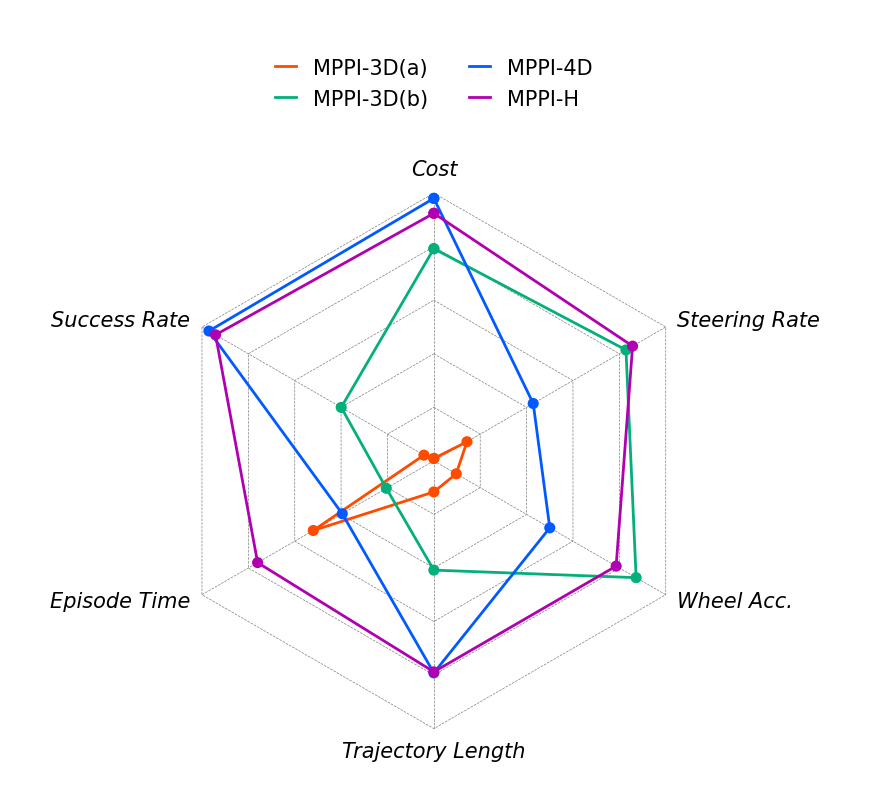

In [85]:
# Evaluation Results of Cylinder Garden
# set original data ["Cost", "Steering Rate", "Wheel Acc.", "Traj. Length", "Episode Time", "Success Rate"]
original_data = [
    [10030.4, 6.0, 6.02, 72.1, 49.6, 33.0],
    [3918.8, 3.6, 3.77, 64.8, 55.9, 58.0],
    [2452.3, 5.0, 4.85, 55.2, 52.1, 98.0],
    [2887.6, 3.5, 4.02, 55.3, 44.8, 96.0],
]

# convert the original data to 0 - 100 scale, bigger is better 
normalized_data = []
which_is_better = ["smaller", "smaller", "smaller", "smaller", "smaller", "bigger"]
min_values = [2300.0, 3.0, 3.4, 50.0, 40.0, 30.0]
max_values = [10100.0, 6.5, 6.3, 75.0, 60.0, 100.1]
for row in original_data:
    normalized_row = []
    for i, value in enumerate(row):
        if which_is_better[i] == "smaller":
            normalized_row.append(100 * (1 - (value - min_values[i]) / (max_values[i] - min_values[i])))
        elif which_is_better[i] == "bigger":
            normalized_row.append(100 * (value - min_values[i]) / (max_values[i] - min_values[i]))
    normalized_data.append(normalized_row)

# create a dataframe
df = pd.DataFrame(
    data=normalized_data,
    index=[
        "MPPI-3D(a)", 
        "MPPI-3D(b)",
        "MPPI-4D",
        "MPPI-H"
    ],
    columns=[
        "Cost",
        "Steering Rate",
        "Wheel Acc.",
        "Trajectory Length",
        "Episode Time",
        "Success Rate",
    ]
)
print(df)

# initialize Circos object & plot radar chart
circos = Circos.radar_chart(
    df,
    vmax=100.0,
    fill=False,
    marker_size=8,
    bg_color=None,
    cmap={
        "MPPI-3D(a)": color["red"],
        "MPPI-3D(b)": color["green"],
        "MPPI-4D": color["blue"],
        "MPPI-H": color["purple"],
    },
    grid_interval_ratio=0.2,
    grid_label_formatter=lambda v: f"{v:.1f}pt",
    label_kws_handler=lambda _: dict(style="italic", size=15),
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="o", ec="none"),
    show_grid_label=False,
)

# save the figure, setting legend location to upper right
fig = circos.plotfig()
_ = circos.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, fontsize=15)
fig.savefig("radar_maze.png", dpi=600, bbox_inches="tight")